In [13]:
import zarr # Check version
import numpy as np

zarr.__version__

'2.13.2'

In [14]:
ncar_data = zarr.open("sciserver-experimental/ariel/tests")

In [3]:
ncar_data.info

Name,/
Type,zarr.hierarchy.Group
Read-only,False
Store type,zarr.storage.DirectoryStore
No. members,6
No. arrays,6
No. groups,0
Arrays,"e, p, t, u, v, w"


<font color="orange">ok, the data is compressed. Let's test access time</font>

In [ ]:
chunk_size = 2**i

In [17]:
chunk_size = (256, 256, 256)
print("Chunk Size: ", np.product(np.array(chunk_size)) / (1024**2), " MB")

Chunk Size:  16.0  MB


## Note: Chunk size = 256^3

In [18]:
a = np.empty(shape=(chunk_size))

In [19]:
%%timeit -o -n 1 -r 1

# _ = ncar_data['t'][:256,:256,:256]
_ = ncar_data['e'][0,0,0]

1.06 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<TimeitResult : 1.06 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)>

In [20]:
%%timeit -o -n 1 -r 1

# _ = ncar_data['t'][:256,:256,:256]
_ = ncar_data['e'][0,0,0]

162 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<TimeitResult : 162 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)>

## Cold Cache - Energy (2.5 Storage Ratio)

In [12]:
%%timeit -o -n 1 -r 1

# _ = ncar_data['t'][:256,:256,:256]
_ = ncar_data['e'][256:512,256:512,256:512]

364 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<TimeitResult : 364 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)>

<font color="orange">Make sure to only access across chunks if you want to</font>

## Warm Access - Energy

In [21]:
%%timeit -o

# _ = ncar_data['t'][:256,:256,:256]
_ = ncar_data['e'][256:512,256:512,256:512]

75.8 ms ± 2.15 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<TimeitResult : 75.8 ms ± 2.15 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>

In [22]:
# _ gets previous output
_.all_runs

[0.07929545198567212,
 0.0744368489831686,
 0.07887243898585439,
 0.07347628800198436,
 0.0744009199552238,
 0.07455734792165458,
 0.07582756597548723]

## Cold Cache - Temp (1.8 Storage Ratio)

In [3]:
%%timeit -o -n 1 -r 1

a = ncar_data['t'][1024:1280,768:1024,512:768]

728 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<TimeitResult : 728 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)>

## Warm access - Temp

In [4]:
%%timeit -o

a = ncar_data['t'][1024:1280,768:1024,512:768]

40.1 ms ± 1.57 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


<TimeitResult : 40.1 ms ± 1.57 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)>

## Cold access - w (Storage Ratio 1.3)

In [5]:
%%timeit -o -n 1 -r 1

_ = ncar_data['w'][:256,:256,:256]

434 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<TimeitResult : 434 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)>

## Warm access - w

In [6]:
%%timeit -o

_ = ncar_data['w'][:256,:256,:256]

78.8 ms ± 1.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


<TimeitResult : 78.8 ms ± 1.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)>

In [53]:
# Need to write uncompressed data - ignore in later runs
# fsstore = zarr.storage.FSStore('ncar_zarr_uncompressed/e')

In [59]:
# https://zarr.readthedocs.io/en/stable/api/creation.html#zarr.creation.array

# e_arr = zarr.creation.array(ncar_data['e'], compressor=None)

In [7]:
# e_arr.info

In [69]:
# # https://github.com/zarr-developers/zarr-python/issues/472
# zarr.save_array("ncar_zarr_uncompressed/e", e_arr, compressor=None)

In [8]:
ncar_e_uncompressed = zarr.open("ncar_zarr_uncompressed/e")

In [9]:
ncar_e_uncompressed.info

Type,zarr.core.Array
Data type,float32
Shape,"(2048, 2048, 2048)"
Chunk shape,"(256, 256, 256)"
Order,C
Read-only,False
Compressor,None
Store type,zarr.storage.DirectoryStore
No. bytes,34359738368 (32.0G)
No. bytes stored,34359738622 (32.0G)
Storage ratio,1.0


### Cold access - Energy Uncompressed

<font color="orange">Timeit runs multiple times. Filesystem should be able to cache better</font>

In [10]:
%%timeit -o -n 1 -r 1

_ = ncar_e_uncompressed[:256,:256,:256]

504 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<TimeitResult : 504 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)>

## Warm access - Energy Uncompressed

In [11]:
%%timeit -o

_ = ncar_e_uncompressed[:256,:256,:256]

136 ms ± 586 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


<TimeitResult : 136 ms ± 586 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)>

In [12]:
_.all_runs

[1.3577309621032327,
 1.3584185810759664,
 1.364055837970227,
 1.3720491729909554,
 1.3634938159957528,
 1.3642271049320698,
 1.374529485940002]

## t-var. Uncompressed - Cold

In [120]:
# https://github.com/zarr-developers/zarr-python/issues/472
# zarr.save_array("ncar_zarr_uncompressed/t", ncar_data['t'], compressor=None)

In [13]:
ncar_e_uncompressed = zarr.open("ncar_zarr_uncompressed/t")
ncar_e_uncompressed.info

Type,zarr.core.Array
Data type,float32
Shape,"(2048, 2048, 2048)"
Chunk shape,"(256, 256, 256)"
Order,C
Read-only,False
Compressor,None
Store type,zarr.storage.DirectoryStore
No. bytes,34359738368 (32.0G)
No. bytes stored,34359738622 (32.0G)
Storage ratio,1.0


In [14]:
%%timeit -o -n 1 -r 1

_ = ncar_e_uncompressed[:256,:256,:256]

397 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<TimeitResult : 397 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)>

## Warm access - Temp Uncompressed

In [15]:
%%timeit -o

_ = ncar_e_uncompressed[:256,:256,:256]

138 ms ± 2.48 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


<TimeitResult : 138 ms ± 2.48 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)>

## w-var Uncompressed. Cold

In [110]:
# # https://github.com/zarr-developers/zarr-python/issues/472
# zarr.save_array("ncar_zarr_uncompressed/w", ncar_data['w'], compressor=None)

In [16]:
ncar_e_uncompressed = zarr.open("ncar_zarr_uncompressed/w")
ncar_e_uncompressed.info

Type,zarr.core.Array
Data type,float32
Shape,"(2048, 2048, 2048)"
Chunk shape,"(256, 256, 256)"
Order,C
Read-only,False
Compressor,None
Store type,zarr.storage.DirectoryStore
No. bytes,34359738368 (32.0G)
No. bytes stored,34359738622 (32.0G)
Storage ratio,1.0


In [17]:
%%timeit -o -n 1 -r 1

_ = ncar_e_uncompressed[:256,:256,:256]

382 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<TimeitResult : 382 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)>

## W-var Warm

In [18]:
%%timeit -o

_ = ncar_e_uncompressed[:256,:256,:256]

136 ms ± 141 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


<TimeitResult : 136 ms ± 141 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)>

## Results overall - milliseconds

#### 256^3 access cube - 64MB

<!-- <font color="orange">  vs  - cold)  ------- Warm </font>

e - 364, 504   ------- 72, 136

t - 728, 397   ------- 40, 138

w - 434, 382   -------  78, 136 -->

<font color="orange">Cold access</font>

| Variable      | Compressed      | Uncompressed |
| ----------- | ----------- | ----------- |
| e           | 364      | 504       |
| t   | 728   | 397        |
| w   | 434   | 382        |


<font color="orange">Warm access</font>

| Variable      | Compressed      | Uncompressed |
| ----------- | ----------- | ----------- |
| e           | 72      | 136       |
| t   | 40   | 138        |
| w   | 78   | 136        |

In [1]:
from matplotlib import pyplot as plt

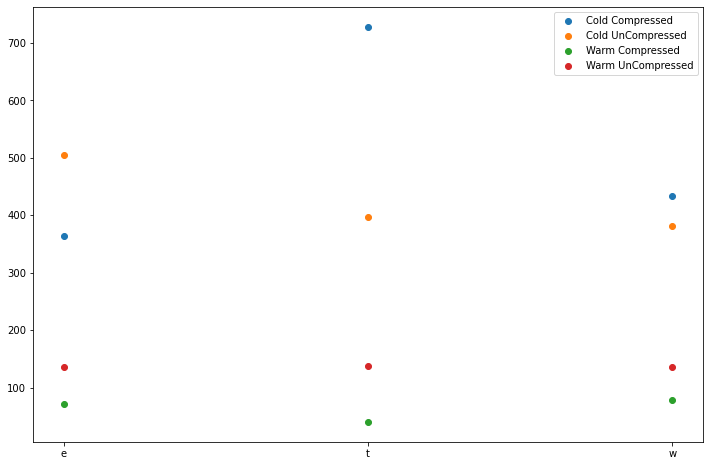

In [12]:
cold_access_comp = [364, 728, 434]
cold_access_uncomp = [504, 397, 382]

warm_access_comp = [72,40,78]
warm_access_uncomp = [136,138, 136]

plt.figure(figsize=(12,8))

plt.scatter(x=['e','t','w'], y=cold_access_comp, label="Cold Compressed")
plt.scatter(x=['e','t','w'], y=cold_access_uncomp, label="Cold UnCompressed")

plt.scatter(x=['e','t','w'], y=warm_access_comp, label="Warm Compressed")
plt.scatter(x=['e','t','w'], y=warm_access_uncomp, label="Warm UnCompressed")

plt.legend()

# Better Experiments below - various access sizes, cache cleared

## <font color="orange"> Process for experiments </font>

1. Cube sizes from $2^6$ to $2^{30}$, starting from biggest. Expressed as Cube Root

2. Read 4GB of data from different variable to make sure cache is clear

3. Pick a random starting point.

4. Read a cube from this starting point (see #1). Cube not guaranteed to be in single chunk

In [30]:
import zarr # Check version
import numpy as np
from matplotlib import pyplot as plt
from random import randint

zarr.__version__

'2.13.2'

In [16]:
chunk_sizes = [ 2**i for i in range(6,30)]

In [17]:
cube_root_size = [int(x ** (1. / 3)) for x in chunk_sizes]
cube_root_size[:5]

[3, 5, 6, 7, 10]

In [18]:
ncar_data = zarr.open("sciserver-experimental/ariel/tests")
ncar_data.info

Name,/
Type,zarr.hierarchy.Group
Read-only,False
Store type,zarr.storage.DirectoryStore
No. members,6
No. arrays,6
No. groups,0
Arrays,"e, p, t, u, v, w"


In [53]:
np.array(cube_root_size)

array([  3,   5,   6,   7,  10,  12,  15,  20,  25,  31,  40,  50,  63,
        80, 101, 127, 161, 203, 255, 322, 406, 511, 645, 812])

# Compressed
## Cold-cache access all chunk sizes 2^6 - 2^30

In [52]:
ncar_data['e'].info

Name,/e
Type,zarr.core.Array
Data type,float32
Shape,"(2048, 2048, 2048)"
Chunk shape,"(256, 256, 256)"
Order,C
Read-only,False
Compressor,"Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)"
Store type,zarr.storage.DirectoryStore
No. bytes,34359738368 (32.0G)
No. bytes stored,13989514907 (13.0G)


In [78]:
# Energy - 2.5 Compression Ratio
for i in range(len(cube_root_size)-1,-1,-1): # From 31st to 0-th (inclusive)
    _ = ncar_data['t'][0:1024,0:1024,0:1024]
    print(cube_root_size[i])
    
    random_start_point = 64 * randint(0, 16)
    %timeit -o -n 1 -r 1 ncar_data['e'][random_start_point:cube_root_size[i] + random_start_point,random_start_point:cube_root_size[i] + random_start_point,random_start_point:cube_root_size[i] + random_start_point]

812
24.2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
645
9.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
511
3.93 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
406
3.42 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
322
1.08 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
255
348 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
203
1.29 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
161
1.41 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
127
111 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
101
827 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
80
110 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
63
109 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
50
136 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
40
112 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
31
129 ms ± 0 ns per loop (mean ± std. dev. of 1 run,

Spikes up/down in time are when access happens between chunks. Cross-chunk access needs decompressing of both chunks

In [84]:
ccc_e_times = [24900, 13200, 3080, 4080, 1280, 728, 1150, 982, 131, 175, 848, 97.6, 92, 118, 148, 115, 117, 123, 20.8, 110, 94.8, 103, 122, 190]
# 2nd run = [24200, 9100, 3930, 3420, 1080, 348, 1290, 1410, 111, 827, 110, 109, 136, 112, 129, 100, 127, 94.7, 102, 97.2, 90.9, 79.9, 112, 104]
ccc_e_times.reverse()

In [56]:
ncar_data['w'].info

Name,/w
Type,zarr.core.Array
Data type,float32
Shape,"(2048, 2048, 2048)"
Chunk shape,"(256, 256, 256)"
Order,C
Read-only,False
Compressor,"Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)"
Store type,zarr.storage.DirectoryStore
No. bytes,34359738368 (32.0G)
No. bytes stored,27329309819 (25.5G)


In [77]:
# w velocity field
# Cross-chunk
for i in range(len(cube_root_size)-1,-1,-1): # From 31st to 0-th (inclusive)
    _ = ncar_data['t'][0:1024,0:1024,0:1024]
#     print(cube_root_size[i])
    
    random_start_point = 64 * randint(0, 16)
    %timeit -o -n 1 -r 1 ncar_data['w'][random_start_point:cube_root_size[i] + random_start_point,random_start_point:cube_root_size[i] + random_start_point,random_start_point:cube_root_size[i] + random_start_point]

22.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
10.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
7.46 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
3.01 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
276 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.27 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
268 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.28 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
99.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
111 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
140 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
127 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
100 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
115 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
171 ms ± 0 ns per loop (mean ± std. dev.

In [83]:
# ccc = Cross-chunk compressed
ccc_w_times = [31500, 54900, 9540, 9010, 2630, 2130, 2840, 2150, 2170, 322, 577, 693, 418, 341, 690, 276, 523, 401, 445, 338, 516, 385, 477, 483]
# 2nd run = [22100, 10100, 7460, 3010, 1200, 276, 1270, 268, 1280, 99.9, 111, 140, 127, 100, 115, 171, 121, 89.6, 191, 122, 138, 143, 116, 148]
ccc_w_times.reverse()

In [57]:
ncar_data['t'].info

Name,/t
Type,zarr.core.Array
Data type,float32
Shape,"(2048, 2048, 2048)"
Chunk shape,"(256, 256, 256)"
Order,C
Read-only,False
Compressor,"Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)"
Store type,zarr.storage.DirectoryStore
No. bytes,34359738368 (32.0G)
No. bytes stored,19025554335 (17.7G)


In [76]:
# Temperature
for i in range(len(cube_root_size)-1,-1,-1): # From 31st to 0-th (inclusive)
    _ = ncar_data['w'][0:1024,0:1024,0:1024]
#     print(cube_root_size[i])
    
    random_start_point = 64 * randint(0, 16)
    %timeit -o -n 1 -r 1 ncar_data['t'][random_start_point:cube_root_size[i] + random_start_point,random_start_point:cube_root_size[i] + random_start_point,random_start_point:cube_root_size[i] + random_start_point]

26.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
8.32 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
2.61 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.59 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.45 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
976 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
833 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
779 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
85.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.95 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
89.6 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
83 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
78.6 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
104 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
110 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
103 ms ± 0 ns per loop (mean ± std. de

I think outliers (too fast) in 2nd run are by chance if random starting point is the same for both?

In [85]:
ccc_t_times = [48300, 18600, 3840, 3520, 2120, 1510, 2070, 414, 242, 184, 302, 230, 290, 301, 425, 294, 273, 248, 227, 286, 170, 234, 257, 266]
# These runs were not sequential. Other cells were run in between

# 2nd run = [26100, 8320, 2610, 1590, 1450, 976, 833, 779, 85.9, 1950, 89.6, 83, 78.6, 104, 110, 103, 74, 89, 87.3, 112, 79.6, 84, 89.2, 134]
ccc_t_times.reverse()

# Uncompressed
## Cold-cache access all chunk sizes 2^6 - 2^30

In [58]:
ncar_uncompressed = zarr.open("ncar_zarr_uncompressed")
ncar_uncompressed.info

Name,/
Type,zarr.hierarchy.Group
Read-only,False
Store type,zarr.storage.DirectoryStore
No. members,3
No. arrays,3
No. groups,0
Arrays,"e, t, w"


In [61]:
ncar_uncompressed['e'].info

Name,/e
Type,zarr.core.Array
Data type,float32
Shape,"(2048, 2048, 2048)"
Chunk shape,"(256, 256, 256)"
Order,C
Read-only,False
Compressor,None
Store type,zarr.storage.DirectoryStore
No. bytes,34359738368 (32.0G)
No. bytes stored,34359738622 (32.0G)


In [75]:
# Energy field
for i in range(len(cube_root_size)-1,-1,-1): # From 31st to 0-th (inclusive)
    _ = ncar_uncompressed['t'][0:1024,0:1024,0:1024]
    print(cube_root_size[i])
    
    random_start_point = 64 * randint(0, 16)
    %timeit -o -n 1 -r 1 ncar_uncompressed['e'][random_start_point:cube_root_size[i] + random_start_point,random_start_point:cube_root_size[i] + random_start_point,random_start_point:cube_root_size[i] + random_start_point]

812
31.2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
645
13.2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
511
5.42 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
406
4.48 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
322
1.33 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
255
1.49 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
203
281 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
161
1.18 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
127
163 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
101
127 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
80
141 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
63
281 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
50
143 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
40
131 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
31
134 ms ± 0 ns per loop (mean ± std. dev. of 1 run

In [86]:
# ccu - cross-chunk uncompressed
ccu_e_times = [64000, 23600, 15500, 44800,3960,3210, 2690, 3960,324,509, 235, 483, 569, 654, 567, 789, 473, 1270, 410, 650, 322, 570, 852]

ccu_e_times.reverse()
# 2nd run = [31200, 13200, 5420, 4480, 1330, 1490, 281, 1180, 163, 127, 141, 281, 1180, 163, 127, 141, 281, 143, 131, 134, 144, 129, 138, 206, 137, 220, 157, 132, 177]

In [62]:
ncar_uncompressed['w'].info

Name,/w
Type,zarr.core.Array
Data type,float32
Shape,"(2048, 2048, 2048)"
Chunk shape,"(256, 256, 256)"
Order,C
Read-only,False
Compressor,None
Store type,zarr.storage.DirectoryStore
No. bytes,34359738368 (32.0G)
No. bytes stored,34359738622 (32.0G)


In [74]:
# w velocity field
for i in range(len(cube_root_size)-1,-1,-1): # From 31st to 0-th (inclusive)
    _ = ncar_uncompressed['t'][0:1024,0:1024,0:1024]
    print(cube_root_size[i])
    
    random_start_point = 64 * randint(0, 16)
    %timeit -o -n 1 -r 1 ncar_uncompressed['w'][random_start_point:cube_root_size[i] + random_start_point,random_start_point:cube_root_size[i] + random_start_point,random_start_point:cube_root_size[i] + random_start_point]

812
21.6 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
645
9.18 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
511
2.53 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
406
4.43 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
322
1.47 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
255
1.17 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
203
1.2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
161
148 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
127
131 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
101
1.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
80
939 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
63
126 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
50
212 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
40
138 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
31
135 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 

In [87]:
ccu_w_times = [59900, 18500, 16700, 17200, 3450, 4390, 4280, 800, 724, 864, 480, 696, 605, 2120, 700, 677, 591, 489, 445, 372, 542, 727, 859, 429]
ccu_w_times.reverse()
# 2nd run = [21600, 9180, 2530, 4430, 1470, 1170, 1200, 148, 131, 1100, 939, 126, 212, 138, 135, 123, 173, 158, 123, 155, 167, 133, 183, 133]

In [63]:
ncar_uncompressed['t'].info

Name,/t
Type,zarr.core.Array
Data type,float32
Shape,"(2048, 2048, 2048)"
Chunk shape,"(256, 256, 256)"
Order,C
Read-only,False
Compressor,None
Store type,zarr.storage.DirectoryStore
No. bytes,34359738368 (32.0G)
No. bytes stored,34359738622 (32.0G)


In [67]:
# temperature field
for i in range(len(cube_root_size)-1,-1,-1): # From 31st to 0-th (inclusive)
    _ = ncar_uncompressed['w'][0:1024,0:1024,0:1024]
    print(cube_root_size[i])
    
    random_start_point = 64 * randint(0, 16)
    %timeit -o -n 1 -r 1 ncar_uncompressed['t'][random_start_point:cube_root_size[i] + random_start_point,random_start_point:cube_root_size[i] + random_start_point,random_start_point:cube_root_size[i] + random_start_point]

812
1min 24s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
645
17.3 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
511
19.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
406
13.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
322
10.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
255
7.39 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
203
878 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
161
480 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
127
2.87 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
101
698 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
80
316 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
63
364 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
50
373 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
40
395 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
31
987 ms ± 0 ns per loop (mean ± std. dev. of 1 r

In [88]:
ccu_t_times = [84000, 17300, 19900, 13500, 10400, 7390, 878, 480, 2870, 698, 316, 364, 373, 395, 987, 992, 412, 390, 340, 528, 430, 444, 490, 374]
ccu_t_times.reverse()

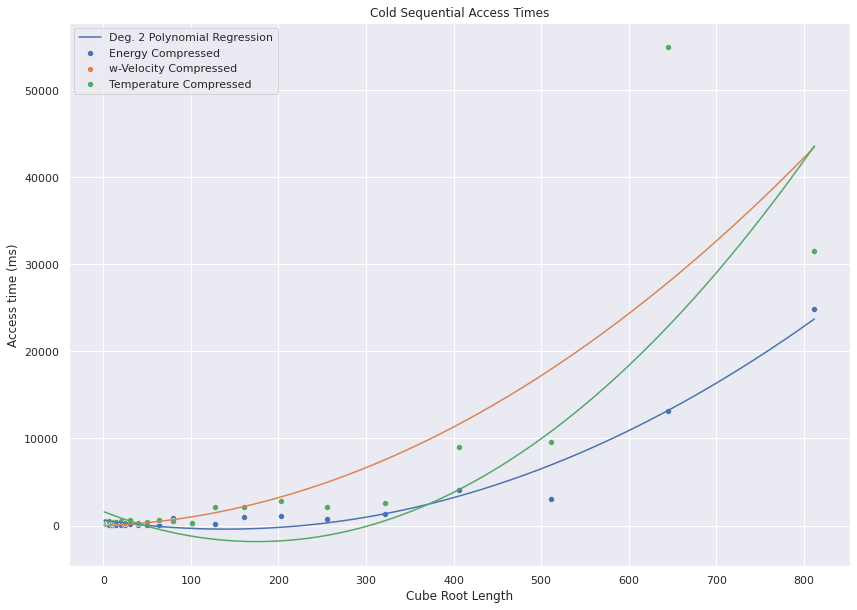

In [104]:
import seaborn as sns
sns.set(rc={'figure.figsize':(14,10)})

# Energy compressed
ax = sns.scatterplot(x=cube_root_size, y=ccc_e_times, label="Energy Compressed").set(xlabel='Cube Root Length', ylabel='Access time (ms)')
#ax.set(xlabel='Cube Root Length', ylabel='Access time (ms)')

# https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
mymodel = np.poly1d(np.polyfit(cube_root_size, ccc_e_times, 2))
myline = np.linspace(1, cube_root_size[len(cube_root_size)-1], 1000)
plt.plot(myline, mymodel(myline), label="Deg. 2 Polynomial Regression")#, color="orange")

# w-velocity compressed
ax = sns.scatterplot(x=cube_root_size, y=ccc_w_times, label="w-Velocity Compressed")

mymodel_w = np.poly1d(np.polyfit(cube_root_size, ccc_w_times, 2))
myline_w = np.linspace(1, cube_root_size[len(cube_root_size)-1], 1000)
plt.plot(myline_w, mymodel_w(myline_w))


# Temperature compressed
ax = sns.scatterplot(x=cube_root_size, y=ccc_w_times, label="Temperature Compressed")

mymodel_t = np.poly1d(np.polyfit(cube_root_size, ccc_t_times, 2))
myline_t = np.linspace(1, cube_root_size[len(cube_root_size)-1], 1000)
plt.plot(myline_t, mymodel_t(myline_t))


plt.title("Cold Sequential Access Times")
plt.show()

In [106]:
access_sizes_log = [i for i in range(6,30)]

Log-Linear scale looks horrible with regression line - don't show it here

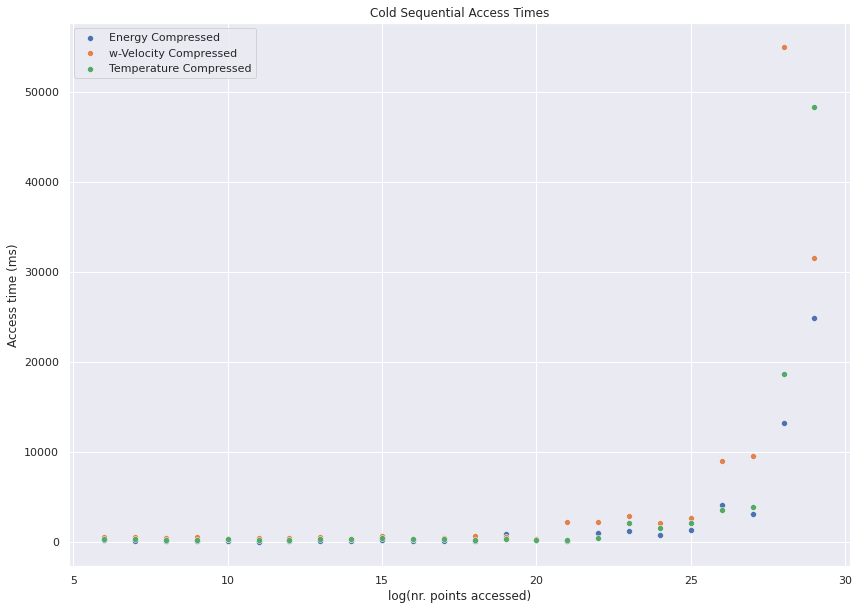

In [117]:
import seaborn as sns
sns.set(rc={'figure.figsize':(14,10)})

# Energy compressed
ax = sns.scatterplot(x=access_sizes_log, y=ccc_e_times, label="Energy Compressed").set(xlabel='log(nr. points accessed)', ylabel='Access time (ms)')
#ax.set(xlabel='Cube Root Length', ylabel='Access time (ms)')

# https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
# mymodel = np.poly1d(np.polyfit(access_sizes_log, ccc_e_times, 2))
# myline = np.linspace(1, access_sizes_log[len(access_sizes_log)-1], 1000)
# plt.plot(myline, mymodel(myline))#, color="orange")

# w-velocity compressed
ax = sns.scatterplot(x=access_sizes_log, y=ccc_w_times, label="w-Velocity Compressed")

# mymodel_w = np.poly1d(np.polyfit(access_sizes_log, ccc_w_times, 2))
# myline_w = np.linspace(1, access_sizes_log[len(access_sizes_log)-1], 1000)
# plt.plot(myline_w, mymodel_w(myline_w))


# Temperature compressed
ax = sns.scatterplot(x=access_sizes_log, y=ccc_t_times, label="Temperature Compressed")

# mymodel_t = np.poly1d(np.polyfit(access_sizes_log, ccc_t_times, 2))
# myline_t = np.linspace(1, access_sizes_log[len(access_sizes_log)-1], 1000)
# plt.plot(myline_t, mymodel_t(myline_t))


plt.title("Cold Sequential Access Times")
plt.show()

# Cold - Minimizing nr. chunks hit

<font color="orange">In above, random initialization means the number of chunks accessed at each run is non-deterministic</font>

Below, I run experiments starting always from the first point (0,0,0) in a randomly chosen chunk

## Compressed

In [70]:
chunk_size = 256

In [71]:
# Energy field
for i in range(len(cube_root_size)-1,-1,-1): # From 31st to 0-th (inclusive)
    _ = ncar_uncompressed['t'][0:1024,0:1024,0:1024]
    print(cube_root_size[i])
    
    random_start_point = chunk_size * randint(0, 4)
    %timeit -o -n 1 -r 1 ncar_uncompressed['e'][random_start_point:cube_root_size[i] + random_start_point,random_start_point:cube_root_size[i] + random_start_point,random_start_point:cube_root_size[i] + random_start_point]

812
36.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
645
8.07 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
511
2.66 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
406
1.88 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
322
1.51 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
255
761 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
203
300 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
161
186 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
127
241 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
101
173 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
80
162 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
63
164 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
50
154 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
40
385 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
31
166 ms ± 0 ns per loop (mean ± std. dev. of 1 run

In [119]:
# MCC - min nr. chunks accessed per nr. points. MCC = min chunk compressed
mcc_e = [36400, 8070, 2660, 1880, 1510, 761, 300, 186, 241, 173, 162, 164, 154, 385, 166, 189, 200, 163, 146, 210, 175, 314, 180, 167]
mcc_e.reverse()

In [72]:
# w velocity field
for i in range(len(cube_root_size)-1,-1,-1): # From 31st to 0-th (inclusive)
    _ = ncar_uncompressed['t'][0:1024,0:1024,0:1024]
    print(cube_root_size[i])
    
    random_start_point = chunk_size * randint(0, 4)
    %timeit -o -n 1 -r 1 ncar_uncompressed['w'][random_start_point:cube_root_size[i] + random_start_point,random_start_point:cube_root_size[i] + random_start_point,random_start_point:cube_root_size[i] + random_start_point]

812
30.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
645
13.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
511
4.22 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
406
1.93 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
322
1.45 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
255
350 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
203
271 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
161
147 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
127
566 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
101
145 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
80
157 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
63
160 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
50
150 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
40
136 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
31
188 ms ± 0 ns per loop (mean ± std. dev. of 1 run

In [118]:
# Outlier at cube_root=127
mcc_w = [30400, 13700, 4220, 1930, 1450, 350, 271, 147, 566, 145, 157, 160, 150, 136, 188, 161, 136, 138, 157, 151, 159, 120, 156, 119]
mcc_w.reverse()

In [73]:
# Temperature field
for i in range(len(cube_root_size)-1,-1,-1): # From 31st to 0-th (inclusive)
    _ = ncar_uncompressed['w'][0:1024,0:1024,0:1024]
    print(cube_root_size[i])
    
    random_start_point = chunk_size * randint(0, 4)
    %timeit -o -n 1 -r 1 ncar_uncompressed['t'][random_start_point:cube_root_size[i] + random_start_point,random_start_point:cube_root_size[i] + random_start_point,random_start_point:cube_root_size[i] + random_start_point]

812
21.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
645
6.56 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
511
2.37 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
406
1.8 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
322
1.41 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
255
320 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
203
204 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
161
141 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
127
130 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
101
150 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
80
120 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
63
173 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
50
422 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
40
173 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
31
132 ms ± 0 ns per loop (mean ± std. dev. of 1 run,

In [121]:
# 1st is >768 => need to read 4 chunks
# 2nd =645 (>512) so 3 chunks. Then 2, and so on
# Outlier at cube size=50. Why?
mcc_t = [21900, 6560, 2370, 1800, 1410, 320, 204, 141, 130, 150, 120, 173, 422, 173, 132, 155, 132, 143, 124, 131, 127, 130, 151, 127]
mcc_t.reverse()

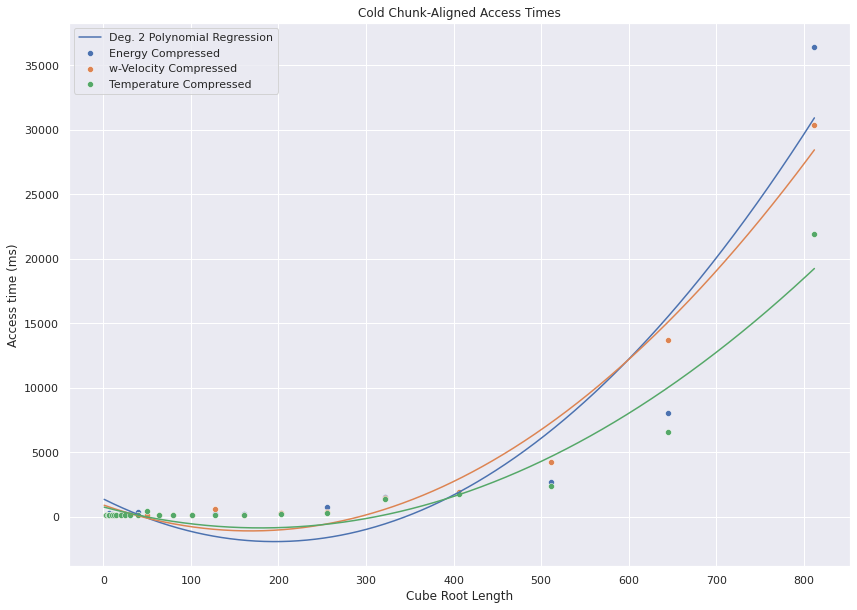

In [123]:
import seaborn as sns
sns.set(rc={'figure.figsize':(14,10)})

# Energy compressed
ax = sns.scatterplot(x=cube_root_size, y=mcc_e, label="Energy Compressed").set(xlabel='Cube Root Length', ylabel='Access time (ms)')
#ax.set(xlabel='Cube Root Length', ylabel='Access time (ms)')

# https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
mymodel = np.poly1d(np.polyfit(cube_root_size, mcc_e, 2))
myline = np.linspace(1, cube_root_size[len(cube_root_size)-1], 1000)
plt.plot(myline, mymodel(myline), label="Deg. 2 Polynomial Regression")#, color="orange")

# w-velocity compressed
ax = sns.scatterplot(x=cube_root_size, y=mcc_w, label="w-Velocity Compressed")

mymodel_w = np.poly1d(np.polyfit(cube_root_size, mcc_w, 2))
myline_w = np.linspace(1, cube_root_size[len(cube_root_size)-1], 1000)
plt.plot(myline_w, mymodel_w(myline_w))


# Temperature compressed
ax = sns.scatterplot(x=cube_root_size, y=mcc_t, label="Temperature Compressed")

mymodel_t = np.poly1d(np.polyfit(cube_root_size, mcc_t, 2))
myline_t = np.linspace(1, cube_root_size[len(cube_root_size)-1], 1000)
plt.plot(myline_t, mymodel_t(myline_t))


plt.title("Cold Chunk-Aligned Access Times")
plt.show()

# Uncompressed

In [79]:
# Energy field
for i in range(len(cube_root_size)-1,-1,-1): # From 31st to 0-th (inclusive)
    _ = ncar_uncompressed['t'][0:1024,0:1024,0:1024]
    print(cube_root_size[i])
    
    random_start_point = chunk_size * randint(0, 4)
    %timeit -o -n 1 -r 1 ncar_uncompressed['e'][random_start_point:cube_root_size[i] + random_start_point,random_start_point:cube_root_size[i] + random_start_point,random_start_point:cube_root_size[i] + random_start_point]

812
37.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
645
13.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
511
2.48 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
406
1.85 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
322
1.45 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
255
303 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
203
297 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
161
187 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
127
142 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
101
192 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
80
146 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
63
131 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
50
215 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
40
147 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
31
145 ms ± 0 ns per loop (mean ± std. dev. of 1 run

In [ ]:
# MCU - Minimum chunk uncompressed. See above what Minimum chunk means
mcu_e = [37900, 13900, 2480, 1850, 1450, 303, 297, 187, 142, 192, 146, 131, 215, 147, 145, 155, 224, 167, 206, 144, 117, 138, 157, 142]
mcu_e.reverse()

In [124]:
# w velocity field
for i in range(len(cube_root_size)-1,-1,-1): # From 31st to 0-th (inclusive)
    _ = ncar_uncompressed['t'][0:1024,0:1024,0:1024]
    print(cube_root_size[i])
    
    random_start_point = chunk_size * randint(0, 4)
    %timeit -o -n 1 -r 1 ncar_uncompressed['w'][random_start_point:cube_root_size[i] + random_start_point,random_start_point:cube_root_size[i] + random_start_point,random_start_point:cube_root_size[i] + random_start_point]

812
44 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
645
11.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
511
4.25 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
406
3.79 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
322
2.78 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
255
342 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
203
273 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
161
218 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
127
188 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
101
182 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
80
223 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
63
148 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
50
167 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
40
154 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
31
160 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 

In [ ]:
mcu_w = [44000, 11900, 4250, 3790, 2780, 342, 273, 218, 188, 182, 223, 148, 167, 154, 160, 145, 149, 170, 152, 216, 164, 139, 179, 164]
mcu_w.reverse()

In [ ]:
# temperature field
for i in range(len(cube_root_size)-1,-1,-1): # From 31st to 0-th (inclusive)
    _ = ncar_uncompressed['w'][0:1024,0:1024,0:1024]
    print(cube_root_size[i])
    
    random_start_point = chunk_size * randint(0, 4)
    %timeit -o -n 1 -r 1 ncar_uncompressed['t'][random_start_point:cube_root_size[i] + random_start_point,random_start_point:cube_root_size[i] + random_start_point,random_start_point:cube_root_size[i] + random_start_point]

812
30.3 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
645
7.74 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
511
2.55 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
406
1.85 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
322
1.63 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
255
307 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
203
263 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
161
164 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
127
161 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
101
151 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:
min_chunk_uncomp_t = [30300, 7740, 2550, 1850, 1630, 307, 263, 164, 161, 151, ]

## Warm-cache access all chunk sizes 2^6 - 2^30

In [ ]:
for i in range(len(cube_root_size)):
#     _ = ncar_data['t'][0:2048,0:2048,0:2048]
    print(cube_root_size[i])
    %timeit -o ncar_data['e'][0:cube_root_size[i],0:cube_root_size[i],0:cube_root_size[i]]

In [ ]:
for i in range(len(cube_root_size)):
#     _ = ncar_data['t'][0:2048,0:2048,0:2048]
    print(cube_root_size[i])
    %timeit -o ncar_data['w'][0:cube_root_size[i],0:cube_root_size[i],0:cube_root_size[i]]

In [ ]:
for i in range(len(cube_root_size)):
#     _ = ncar_data['t'][0:2048,0:2048,0:2048]
    print(cube_root_size[i])
    %timeit -o ncar_data['t'][0:cube_root_size[i],0:cube_root_size[i],0:cube_root_size[i]]

# <font color="red">Uncompressed</font>

In [ ]:
ncar_e_uncompressed = zarr.open("ncar_zarr_uncompressed/e")
ncar_e_uncompressed.info

## Cold-cache access all chunk sizes 2^6 - 2^30